<a href="https://colab.research.google.com/github/lokajmato/Tensorflow_course_2022_mrdbourke/blob/main/02_Classification_course.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

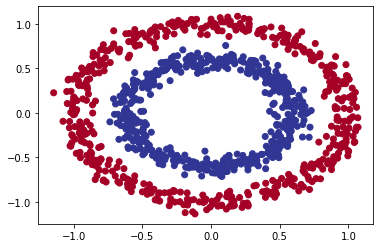

In [ ]:
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
import pandas as pd

n_samples = 1000
X, y = make_circles(n_samples, noise=0.06, random_state=42, factor=0.6)

df = pd.DataFrame({"X": X[:, 0], "y": X[:, 1], "out": y})


plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

In [ ]:
from sklearn.model_selection import train_test_split
import tensorflow as tf

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = tf.keras.Sequential([
  tf.keras.Input(shape=(2)),
  tf.keras.layers.Dense(20, "relu"),
  tf.keras.layers.Dense(1, "sigmoid")
])

model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics="accuracy")

es = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)

model.fit(X_train, y_train, epochs=150, callbacks=es, verbose=0)

Epoch 1/350
25/25 [==============================] - 1s 1ms/step - loss: 0.6783 - accuracy: 0.5100
Epoch 2/350
25/25 [==============================] - 0s 2ms/step - loss: 0.6730 - accuracy: 0.5275
Epoch 3/350
25/25 [==============================] - 0s 2ms/step - loss: 0.6682 - accuracy: 0.5450
Epoch 4/350
25/25 [==============================] - 0s 1ms/step - loss: 0.6633 - accuracy: 0.5625
Epoch 5/350
25/25 [==============================] - 0s 1ms/step - loss: 0.6585 - accuracy: 0.5525
Epoch 6/350
25/25 [==============================] - 0s 1ms/step - loss: 0.6537 - accuracy: 0.5425
Epoch 7/350
25/25 [==============================] - 0s 1ms/step - loss: 0.6489 - accuracy: 0.5450
Epoch 8/350
25/25 [==============================] - 0s 1ms/step - loss: 0.6440 - accuracy: 0.5462
Epoch 9/350
25/25 [==============================] - 0s 2ms/step - loss: 0.6387 - accuracy: 0.5575
Epoch 10/350
25/25 [==============================] - 0s 2ms/step - loss: 0.6336 - accuracy: 0.5500
Epoch 11/

In [ ]:
X_test[5], y_test[5]

In [ ]:
model.evaluate(X_test, y_test)
pred = model.predict(X_test)

In [ ]:
import numpy as np

def plot_decision_boundary(model, X, y):

  X_min, X_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1

  xx, yy = np.meshgrid(np.linspace(X_min, X_max, num=50),
                       np.linspace(y_min, y_max, num=50))
  
  X_in = np.c_[xx.ravel(), yy.ravel()]

  y_pred = model.predict(X_in)

  y_pred = np.round(y_pred).reshape(xx.shape)

  xx.shape, yy.shape, y_pred.shape
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

In [ ]:
plot_decision_boundary(model, X, y)

In [ ]:
pred_int = tf.cast(pred.round(), dtype=tf.int32)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.RdYlBu)
plt.scatter(X_test[:, 0], X_test[:, 1], c=pred_int) 
;

In [ ]:
model1 = tf.keras.Sequential([
  tf.keras.layers.Dense(5, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')      
])

model1.compile(optimizer=tf.keras.optimizers.Adam(lr=0.01),
               loss=tf.keras.losses.BinaryCrossentropy(),
               metrics=['accuracy'])

model1.fit(X_train, y_train, epochs=200, verbose=0)

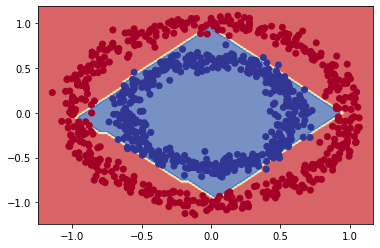

In [ ]:
plot_decision_boundary(model1, X, y)

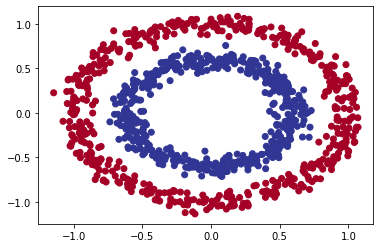

In [ ]:
import sklearn
import sklearn.model_selection 
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import numpy as np

x, y = sklearn.datasets.make_circles(1000, noise=0.06, random_state=42, factor=0.6)

plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.RdYlBu)

In [ ]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, train_size=0.8)

model = tf.keras.Sequential([
  tf.keras.layers.Dense(5, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.01),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=["accuracy"])

es = tf.keras.callbacks.EarlyStopping(monitor="loss", patience=5)
es_lr = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4*10**(epoch/20))
hist = model.fit(X_train, y_train, epochs=100, callbacks=[es, es_lr], verbose=0)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.5838 - accuracy: 0.8350


[0.5837541222572327, 0.8349999785423279]

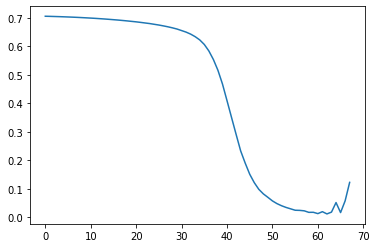

In [ ]:
plt.plot(hist.history["loss"])

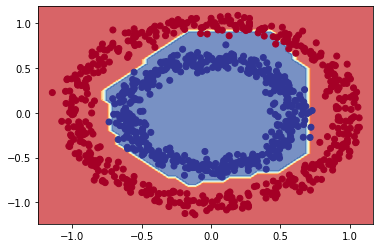

In [ ]:
plot_decision_boundary(model, x, y)

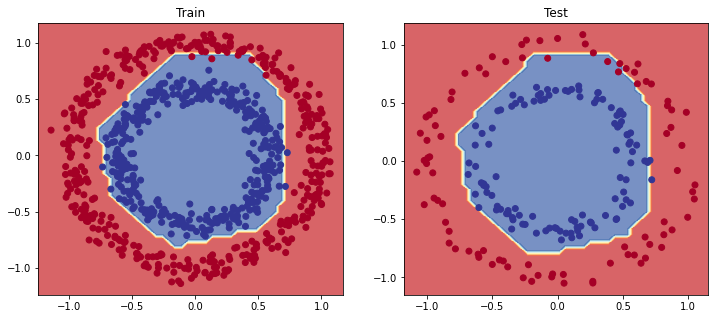

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model, X_test, y_test)

Text(0.5, 1.0, 'Model_loss_curve')

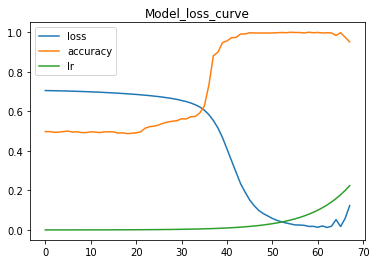

In [ ]:
pd.DataFrame(hist.history).plot()
plt.title("Model_loss_curve")

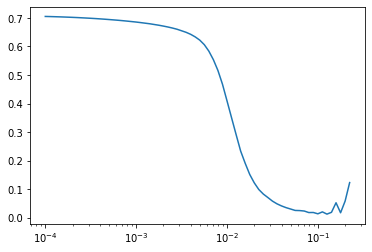

In [ ]:
plt.plot(hist.history['lr'], hist.history['loss'])
plt.xscale("log")

In [ ]:
y_pred = model.predict(X_test)

cm = sklearn.metrics.confusion_matrix(y_test, y_pred.round())
y_test.shape, y_pred.shape

((200,), (200, 1))

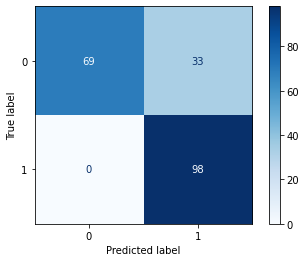

In [ ]:
sklearn.metrics.ConfusionMatrixDisplay(cm).plot(cmap=plt.cm.Blues)

In [ ]:
from tensorflow.keras.datasets import fashion_mnist

(training_data, training_labels), (test_data, test_labels) = fashion_mnist.load_data()

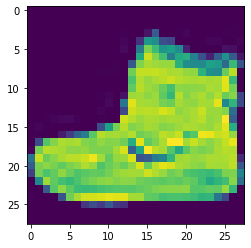

In [ ]:
training_data[0], training_labels[0]
plt.imshow(training_data[0])

In [ ]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

Text(0.5, 1.0, 'Ankle boot')

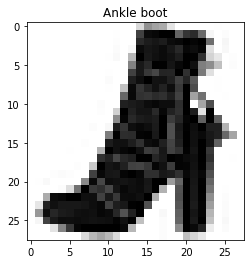

In [ ]:
index_ch = 11
plt.imshow(training_data[index_ch], cmap=plt.cm.binary)
plt.title(class_names[training_labels[index_ch]])

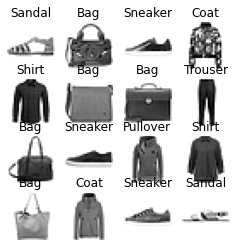

In [ ]:
import random

plt.figure(figsize=(4,4))

for i in range(16):
  plt.subplot(4, 4, i+1)
  rand = random.choice(range(len(training_data)))
  plt.imshow(training_data[rand], cmap=plt.cm.binary)
  plt.title(class_names[training_labels[rand]])
  plt.axis(False)
  

In [ ]:
training_data.shape, training_labels.shape

((60000, 28, 28), (60000,))

In [ ]:
training_labelsB = tf.one_hot(training_labels, 10)
training_labelsB.shape, training_data.shape
testing_labelsB = tf.one_hot(test_labels, 10)

In [ ]:
#Model

model2 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax")                           
])

model2.compile(optimizer=tf.keras.optimizers.Adam(),
               loss=tf.keras.losses.CategoricalCrossentropy(),
               metrics="accuracy")

model2.fit(training_data,
           training_labelsB,
           epochs=10, validation_data=(test_data, testing_labelsB))

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 2.8597 - accuracy: 0.6702 - val_loss: 0.7829 - val_accuracy: 0.7374
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6812 - accuracy: 0.7365 - val_loss: 0.6861 - val_accuracy: 0.7677
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5953 - accuracy: 0.7869 - val_loss: 0.6123 - val_accuracy: 0.7870
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5595 - accuracy: 0.8008 - val_loss: 0.5585 - val_accuracy: 0.8088
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5389 - accuracy: 0.8107 - val_loss: 0.6009 - val_accuracy: 0.7989
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5209 - accuracy: 0.8185 - val_loss: 0.5461 - val_accuracy: 0.8131
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5083 - accuracy: 0.8222 - val_loss: 0.5628 - val_accuracy:

In [ ]:
training_data.max()

255

In [ ]:
#Data normalization
train_data_norm = training_data / 255.0
test_data_norm = test_data / 255.0


In [ ]:
model3 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(50, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax")
])

model3.compile(optimizer=tf.keras.optimizers.Adam(),
               loss=tf.keras.losses.CategoricalCrossentropy(),
               metrics=["accuracy"])

model3.fit(train_data_norm,
           training_labelsB,
           epochs=10,
           validation_data=(test_data_norm, testing_labelsB))

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5446 - accuracy: 0.8135 - val_loss: 0.4607 - val_accuracy: 0.8362
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4122 - accuracy: 0.8545 - val_loss: 0.4246 - val_accuracy: 0.8516
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3748 - accuracy: 0.8652 - val_loss: 0.4000 - val_accuracy: 0.8582
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3522 - accuracy: 0.8729 - val_loss: 0.4012 - val_accuracy: 0.8549
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3323 - accuracy: 0.8798 - val_loss: 0.3735 - val_accuracy: 0.8691
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3170 - accuracy: 0.8845 - val_loss: 0.3741 - val_accuracy: 0.8653
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3060 - accuracy: 0.8886 - val_loss: 0.3646 - val_accuracy:

In [ ]:
from gc import callbacks
tf.random.set_seed(42)

model4 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28)),
  tf.keras.layers.Dense(20, activation="relu"),
  tf.keras.layers.Dense(20, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax")
])

model4.compile(optimizer=tf.keras.optimizers.Adam(),
               loss=tf.keras.losses.CategoricalCrossentropy(),
               metrics=["accuracy"])

#cb_lr = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4*10**(epoch/5))
m4_hist = model4.fit(train_data_norm,
                     training_labelsB,
                     epochs=120,
                     validation_data=(test_data_norm, testing_labelsB),
                     callbacks=[]) 


Epoch 1/120
1875/1875 [==============================] - 40s 21ms/step - loss: 0.5796 - accuracy: 0.8003 - val_loss: 0.4699 - val_accuracy: 0.8354
Epoch 2/120
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4192 - accuracy: 0.8514 - val_loss: 0.4908 - val_accuracy: 0.8348
Epoch 3/120
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3908 - accuracy: 0.8609 - val_loss: 0.4200 - val_accuracy: 0.8517
Epoch 4/120
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3699 - accuracy: 0.8688 - val_loss: 0.4251 - val_accuracy: 0.8521
Epoch 5/120
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3574 - accuracy: 0.8715 - val_loss: 0.4152 - val_accuracy: 0.8528
Epoch 6/120
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3457 - accuracy: 0.8762 - val_loss: 0.4340 - val_accuracy: 0.8452
Epoch 7/120
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3380 - accuracy: 0.8774 - val_loss: 0.4236 - val_

In [ ]:

plt.plot(m4_hist.history["lr"], m4_hist.history["loss"])
plt.xscale("log")
plt.xlabel("Learning rate")
plt.ylabel("loss")


KeyError: ignored

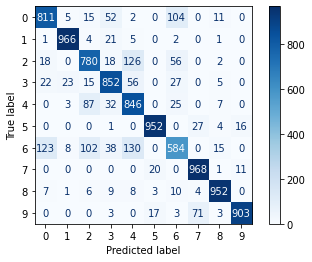

In [ ]:
cm1 = sklearn.metrics.confusion_matrix(test_labels, model4.predict(test_data_norm).argmax(axis=1))

sklearn.metrics.ConfusionMatrixDisplay(cm1).plot(cmap=plt.cm.Blues)


In [ ]:
weights, biases = model4.layers[1].get_weights()
weights.shape


(784, 20)